In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate 
import pandas as pd
sns.set_theme()

# Задача 6.1
Требуется  исследовать поведение погрешностей при численном дифференцировании.  


## Пункт 1
Данная функция : $f'(x) = af(x) + bf(x + 10h) + cf(x - 7h) + df(x + 2h)$   
1.Определить коэффициенты a, b, c, d так, чтобы формула имела максимальный порядок точности.  
2.  Реализовать программно полученную формулу численного дифференцирования и формулу правой разностной производной.   
3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 5.1. На отрезке [a,b]   построить графики точной производной и полученные по формулам  численного дифференцирования, выбрав шаг  h0=0.0001 .


Определяем коэфициенты в формуле численного дифференцирования:

In [2]:
h = 0.0001 
matrix = np.array(
[
    [1, 1, 1, 1],
    [0, 10*h, -7*h, 2*h],
    [0, 100/2*h**2, 49/2*h**2, 4/2*h**2],
    [0, 1000/6*h**3, -343/6*h**3, 8/6*h**3]
]
)
neded = [0, 1, 0, 0]
coefs = np.linalg.solve(matrix, neded)

In [3]:
print(f"Полученные коэфициенты: {coefs}")

Полученные коэфициенты: [-4571.42857143  -102.94117647  -186.74136321  4861.11111111]


Функция из 5.1:  
$P_n(x) = 6.6 - 3.7x - 8.4x^2 + 5.5x^3 + x^4$

Далее строим три функции расчета, самой функции, ее производной, полученной аналитически,  
а так же формулы численного дифференцирования с полученными коэфициентами и левой разностной производной.

In [4]:
def func(x):
    return 6.6 - 3.7*x - 8.4*x**2 + 5.5*x**3 + x**4
def true_der(x):
    return -3.7 - 16.8*x + 16.5*x**2 + 4*x**3
def counted_der(x, coeficients, h):
    return coeficients[0]*func(x) + coeficients[1]*func(x + 10*h) + \
        coeficients[2]*func(x - 7*h) + coeficients[3]*func(x + 2*h)
def left_(x, h):
    return (func(x + h) - func(x))/h

In [5]:
a, b = 1, 3
n = int((b - a)/h)
x = np.linspace(a, b, n)

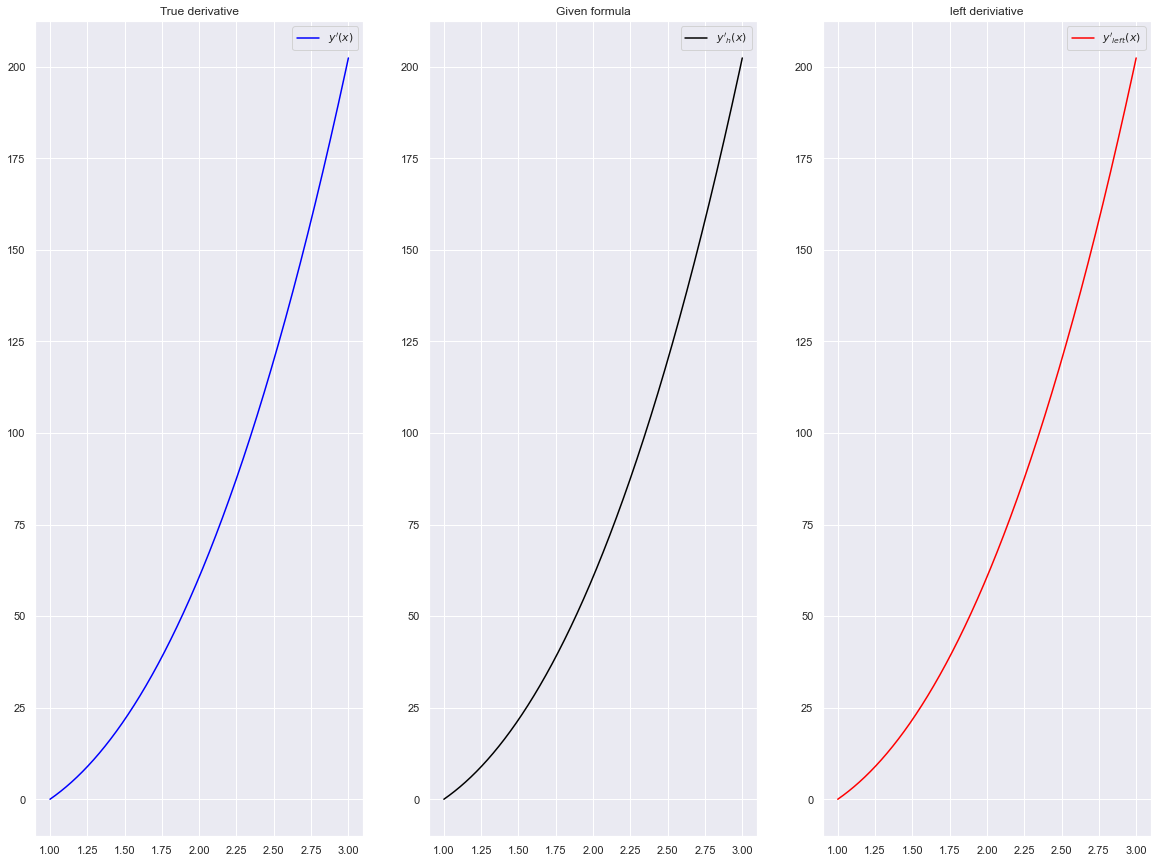

In [6]:
fig, ax = plt.subplots(1,3,figsize=(20,15))

ax[0].plot(x, true_der(x), c='blue', label="$ y'(x)$")
ax[1].plot(x, counted_der(x, coefs, h), c='black', label="$ y'_{h}(x)$")
ax[2].plot(x, left_(x, h), c='red', label="$y'_{left}(x)$")

ax[0].set_title("True derivative")
ax[1].set_title("Given formula")
ax[2].set_title("left deriviative")

ax[0].legend()
ax[1].legend()
ax[2].legend()

In [7]:
print("Максимальные отклонения от настоящей производной на отрезке [a, b]")
print("Левая разностная производная :", np.abs(left_(x, h) - true_der(x)).max())
print("Данная формула", np.abs(counted_der(x, coefs, h) - true_der(x)).max())

Максимальные отклонения от настоящей производной на отрезке [a, b]
Левая разностная производная : 0.009510175698437706
Данная формула 5.452989171317313e-10


## Пункт 2
4. Выбрать фиксированную точку на отрезке [a,b] и вычислить значения производных  по формулам  численного дифференцирования,    уменьшая шаг дифференцирования  h0=0.1 последовательно в 10 раз:  , k=0,1,2,…  
Найти оптимальное значение шага дифференцирования для каждой формулы численного дифференцирования.  
По полученным данным построить графики погрешностей.
  
В качестве функции возьмет ту, которую использовале в пункте 1, в качестве точки на которой будем вести расчеты - 1

In [8]:
x = np.array([1])
h = 10**(-4)
h_list = []
left_list = []
my_list = []
for i in range(1, 10):
    h = 10**(-i)
    h_list.append(h)
    matrix = np.array(
    [
        [1, 1, 1, 1],
        [0, 10*h, -7*h, 2*h],
        [0, 100/2*h**2, 49/2*h**2, 4/2*h**2],
        [0, 1000/6*h**3, -343/6*h**3, 8/6*h**3]
    ]
    )
    neded = [0, 1, 0, 0]
    coefs = np.linalg.solve(matrix, neded)
    my_list.append((coefs[0]*func(x) + coefs[1]*func(x + 10*h) + coefs[2]*func(x - 7*h) + 
                    coefs[3]*func(x + 2*h) - true_der(x))[0])
    left_list.append((left_(x, h) - true_der(x))[0])
h_list = np.array(h_list)
left_list = np.array(left_list)
my_list = np.array(my_list)

In [9]:
df = pd.DataFrame()
df['Шаг h'] = h_list
df['Разница для данного метода'] = my_list
df['Разница для левой разностной производной'] = left_list
df

,Шаг h,Разница для данного метода,Разница для левой разностной производной
0,1.000000e-01,-1.400000e-01,1.506000e+00
1,1.000000e-02,-1.400000e-04,1.419510e-01
2,1.000000e-03,-1.399998e-07,1.410950e-02
3,1.000000e-04,-1.427907e-10,1.410095e-03
4,1.000000e-05,-7.275958e-12,1.410010e-04
5,1.000000e-06,3.492460e-10,1.409939e-05
6,1.000000e-07,-9.313226e-09,1.398881e-06
7,1.000000e-08,1.490116e-08,6.661338e-08
8,1.000000e-09,0.000000e+00,0.000000e+00


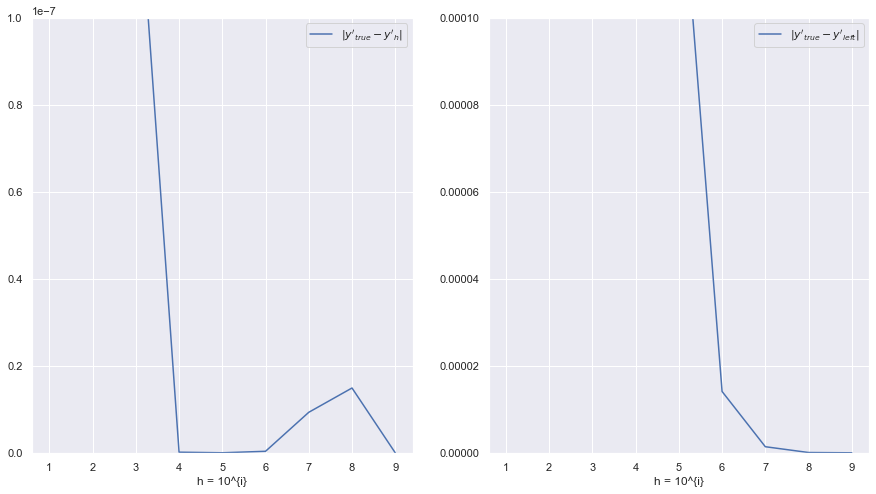

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(np.arange(9) + 1, abs(my_list), label="$|y'_{true} - y'_h|$")
ax[0].set_ylim(0, 10**-7)
ax[0].set_xlabel("h = 10^{i}")
ax[0].legend()

ax[1].plot(np.arange(9) + 1, abs(left_list), label="$|y'_{true} - y'_{left}|$")
ax[1].set_ylim(0, 10**-4)
ax[1].set_xlabel("h = 10^{i}")
ax[1].legend()

Как видим, оптимальным шагом для данного метода является $h^{-4}$, а для левой разностной производной $h^{-7}$.  
Это согласуется с нашими теоретическими выкладками, т.к. данный метод - метод 4 порядка точности, а левой разностной производной - 1 порядка, те разница в нужных им степенях в h отличается ровно на столько, на сколько разные у них порядки точности.  
-7 - (-4) = 4 - 1 = 3

# Задача 6.2
Найти  приближенное решение  задачи Коши для обыкновенного дифференциального  уравнения (ОДУ) 1 порядка с точностью
  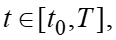 

1. Найти аналитическое решение задачи  
2. Составить  программу вычисления  решения  методом Эйлера с  заданной точностью, используя правило Рунге. 
Найти решение задачи с точностью   , число точек N и шаг, при котором точность достигается.    
Построить график решения.
3. Составить  программу вычисления  решения с  заданной точностью методом 
индивидуального варианта. 
Найти решение задачи с заданной точностью,   число точек N    
и шаг, при котором точность достигается.   
Построить график решения задачи.
4. Сравнить полученные результаты. 


Условия:  
$r(t) = cos(2t) + 0.1$,  
$y_0 = 1.783$,  
$t_0 = 0, T = \pi/2$

Аналитическое решение:
$(y =C_1e^{0.1t + 0.5sin(2t)}$ , C_1 = 1.783)   =>  
   
$y =1.783*e^{0.1t + 0.5sin(2t)}$

In [11]:
eps = 10**(-4)
t0 = 0
T = np.pi/2
y0 = 1.783

In [15]:
def function(x, y):
    return (np.cos(2*x) + 0.1)*y

def analytical(x):
    return 1.783*np.exp(0.1*x + 0.5*np.sin(2*x))

def simple_euler(x_i, y_i, h):
    return y_i + h*function(x_i, y_i)

def method_runge(a, b, eps, y0, function):
    h = 0.1
    h_2 = h / 2
    
    n = int((b - a) / h)
    n_2 = int((b - a) / h_2)
    
    x_h = np.linspace(a, b, n + 2)
    x_h_2 = np.linspace(a, b, n_2 + 2)
        
    y_list=[]
    y_2_list=[]
    #lmbd = lambda x, y: return y
    for i, x in np.ndenumerate(x_h):
        if i[0]==0:
            y_list = np.array([y0])
        else:
            y_list = np.append(y_list, simple_euler(x, y_list[i[0]-1], h))
    for i, x in np.ndenumerate(x_h_2):
        if i[0]==0:
            y_2_list = np.array([y0])
        else:
            y_2_list = np.append(y_2_list, simple_euler(x, y_2_list[i[0]-1], h_2))
            
              
    print(x_h, x_h_2)
    if (y_list.shape[0]*2 == y_2_list.shape[0]):
        r = y_list - y_2_list[0::2]
    elif (y_list.shape[0]*2 > y_2_list.shape[0]):
         #print(int(y_2_list.shape[0]/2))
        r = y_list[:int((y_2_list.shape[0]+1)/2):] - y_2_list[0::2]
    elif (y_list.shape[0]*2 < y_2_list.shape[0]):
        r = y_list - y_2_list[0:y_list.shape[0]*2:2]
    
    history = []
    history.append(y_2_list)
    while (np.abs(r).max() > eps):
        #print(h)
        h = h_2
        h_2 = h / 2

        n = int((b - a) / h)
        n_2 = int((b - a) / h_2)

        x_h = np.linspace(a, b, n + 2)
        x_h_2 = np.linspace(a, b, n_2 + 2)

        y_list=y_2_list.copy()
        y_2_list=[]
        #lmbd = lambda x, y: return y

        for i, x in np.ndenumerate(x_h_2):
            if i[0]==0:
                y_2_list = np.array([y0])
            else:
                y_2_list = np.append(y_2_list, simple_euler(x, y_2_list[i[0]-1], h_2))
                      
        #print(y_list.shape[0], y_2_list.shape[0])
        if (y_list.shape[0]*2 == y_2_list.shape[0]):
            r = y_list - y_2_list[0::2]
        elif (y_list.shape[0]*2 > y_2_list.shape[0]):
            #print(int(y_2_list.shape[0]/2))
            r = y_list[:int((y_2_list.shape[0]+1)/2):] - y_2_list[0::2]
        elif (y_list.shape[0]*2 < y_2_list.shape[0]):
            r = y_list - y_2_list[0:y_list.shape[0]*2:2]
        #print(y_2_list)
        history.append(y_2_list)    
        
    return x_h_2, y_2_list, h, r, n_2, history

In [16]:
x_result, y_result, h_result, r_result, n_result, history = method_runge(t0, T, eps, y0, function)

[0.         0.09817477 0.19634954 0.29452431 0.39269908 0.49087385
 0.58904862 0.68722339 0.78539816 0.88357293 0.9817477  1.07992247
 1.17809725 1.27627202 1.37444679 1.47262156 1.57079633] [0.         0.04908739 0.09817477 0.14726216 0.19634954 0.24543693
 0.29452431 0.3436117  0.39269908 0.44178647 0.49087385 0.53996124
 0.58904862 0.63813601 0.68722339 0.73631078 0.78539816 0.83448555
 0.88357293 0.93266032 0.9817477  1.03083509 1.07992247 1.12900986
 1.17809725 1.22718463 1.27627202 1.3253594  1.37444679 1.42353417
 1.47262156 1.52170894 1.57079633]


In [17]:
print(f"Нужный для точности {eps} шаг : {h_result}")
print(f"Количество шагов для данного шага : {n_result}")
print(f"Точность до уточнения по правилу Рунге : {np.abs(y_result - analytical(x_result)).max()}")
print(f"Точность после уточнения по правилу Рунге : \
      {np.abs(y_result[::2] + np.abs(r_result[::]) - analytical(x_result)[::2]).max()}")

Нужный для точности 0.0001 шаг : 4.8828125e-05
Количество шагов для данного шага : 64339
Точность до уточнения по правилу Рунге : 7.604556288498543e-05
Точность после уточнения по правилу Рунге :       5.250306675641525e-06


Как видим, точность после уточнения по Рунге выше, чего мы и ожидали.  
Ниже представлены графики первых 5 приближений

In [ ]:
for i in history[:4]:
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    x = np.linspace(t0,T,i.shape[0])
    ax.plot(x, i)
    ax.plot(x, analytical(x))

Данная формула : Интерполяционный метод адамса 2 порядка:
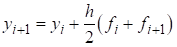  
Из данной формулы можно выделить явную:  

$y_{n+1} = \frac{y_n + \frac{h}{2}(r_n y_n)}{1 -  \frac{h}{2} r_{n+1}}$

In [ ]:
def simple_adams2(x_i, y_i, h):
    return (y_i + h/2*function(x_i, y_i))/(1 - h/2*r(x_i))

In [ ]:
x_result, y_result, h_result, r_result, n_result, history = method_runge(t0, T, eps, y0, function, simple_adams2)

In [ ]:
np.abs(r_result).max()

In [ ]:
print(f"Нужный для точности {eps} шаг : {h_result}")
print(f"Количество шагов для данного шага : {n_result}")
print(f"Точность до уточнения по правилу Рунге : {np.abs(y_result - analytical(x_result)).max()}")
print(f"Точность после уточнения по правилу Рунге : \
      {np.abs(y_result[::2] + np.abs(r_result[::]) - analytical(x_result)[::2]).max()}")

In [ ]:
for i in history[:4]:
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    x = np.linspace(t0,T,i.shape[0])
    ax.plot(x, i)
    ax.plot(x, analytical(x))